# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

# Get Cleaned Train Data

In [2]:
df_cl = pd.read_csv("../datasets/train_cleaned.csv")

## Run ensemble of linear regression models, let's see what happens

### Model 1 - Top variables plus Style and neighborhood variables

In [3]:
# Define X & y variables
X_list_1 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Age At Sale', 
            'Years Since Remod/Add', 'TotRms AbvGrd', 'HasFireplace', 
            'BsmtFin Type 1_GLQ','MS SubClass_20', 'MS SubClass_30', 'MS SubClass_45', 
            'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75',  
            'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90',   
            'MS SubClass_180', 'MS SubClass_190',   
            'MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM',  
            'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',  
            'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',  
            'Neighborhood_IDOTRR',   
            'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',   
            'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',  
            'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',  
            'Neighborhood_StoneBr',   
            'Bldg Type_Duplex', 'Bldg Type_TwnhsE', 'House Style_2.5Fin']
X1 = df_cl[X_list_1]
y = df_cl["SalePrice"]

In [4]:
# Create train test split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = .25, random_state=42)

### Run PowerTransformer on X data

In [5]:
pt = PowerTransformer()
pt.fit(X1_train)
X1_train = pt.transform(X1_train)
X1_test = pt.transform(X1_test)

### Run PowerTransformer on Y data

In [6]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

### Instantiate models

In [7]:
# Instantiate model
lm1 = LinearRegression()

### Cross Validation

In [8]:
# Run cross validation
cross_val_score(lm1, X1_train, y_train_pt, cv=5).mean()

0.8653097532702411

### Model Fit & Evaluation

In [9]:
# Fit model
lm1.fit(X1_train, y_train_pt);

In [10]:
# Score training data
lm1.score(X1_train, y_train_pt)

0.8786068748618475

In [11]:
# Score test data
lm1.score(X1_test, y_test_pt)

0.8648440937006815

### Check residuals

In [12]:
preds1 = lm1.predict(X1_test)

In [13]:
preds1.mean()

0.012159766349883583

In [14]:
pred1_reversed = pt_y.inverse_transform(preds1.reshape(-1,1))

In [15]:
pred1_reversed.mean()

180124.52293906393

In [16]:
residuals = y_test_pt - preds1

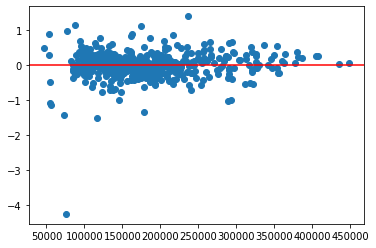

In [17]:
plt.scatter(pred1_reversed, residuals)
plt.axhline(0, color='r');

In [19]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, pred1_reversed))

26004.987880626064

In [2220]:
X = sm.add_constant(X1_train)
y = y_train_pt
model = sm.OLS(y, X).fit()

In [2221]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:46:05   Log-Likelihood:                -560.72
No. Observations:                1538   AIC:                             1219.
Df Residuals:                    1489   BIC:                             1481.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.341e-15      0.009  -2.59e-13      1.000      -0.018       0.018
x1             0.2536      0.018     14.317      0.000       0.219       0.288
x2             0.2792      0.028      9.863      0.000       0.224       0.335
x3             0.0822      0.013      6.148      0.000       0.056       0.108
x4             0.0785      0.015      5.168      0.000       0.049       0.108
x5             0.0751      0.024      3.093      0.002       0.027       0.123
x6            -0.0200      0.026     -0.755      0.451      -0.072       0.032
x7            -0.1242      0.015     -8.170      0.000      -0.154      -0.094
x8            -0.0389      0.018     -2.222      0.026      -0.073      -0.005
x9             0.0638      0.012      5.342      0.000       0.040       0.087
x10            0.0774      0.011      6.766      0.000       0.055       0.100
x11            0.2026      0.033      6.111      0.000       0.138       0.268
x12            0.0412      0.018      2.319      0.021       0.006       0.076
x13            0.0374      0.011      3.552      0.000       0.017       0.058
x14            0.1018      0.022      4.644      0.000       0.059       0.145
x15            0.1879      0.028      6.782      0.000       0.134       0.242
x16            0.0748      0.018      4.215      0.000       0.040       0.110
x17            0.0375      0.012      3.164      0.002       0.014       0.061
x18            0.0893      0.015      5.793      0.000       0.059       0.120
x19            0.0673      0.012      5.594      0.000       0.044       0.091
x20            0.0192      0.008      2.513      0.012       0.004       0.034
x21            0.0184      0.010      1.774      0.076      -0.002       0.039
x22            0.0428      0.014      3.060      0.002       0.015       0.070
x23            0.1943      0.032      6.004      0.000       0.131       0.258
x24            0.0611      0.014      4.447      0.000       0.034       0.088
x25            0.2850      0.047      6.030      0.000       0.192       0.378
x26            0.2434      0.038      6.444      0.000       0.169       0.318
x27           -0.0183      0.012     -1.569      0.117      -0.041       0.005
x28           -0.0415      0.016     -2.597      0.009      -0.073      -0.010
x29            0.0159      0.010      1.532      0.126      -0.004       0.036
x30           -0.0339      0.015     -2.221      0.027      -0.064      -0.004
x31            0.0322      0.013      2.478      0.013       0.007       0.058
x32           -0.0970      0.016     -6.175      0.000      -0.128      -0.066
x33           -0.0437      0.014     -3.132      0.002      -0.071      -0.016
x34           -0.0851      0.018     -4.687      0.000      -0.121      -0.049
x35           -0.0306      0.012     -2.467      0.014      -0.055      -0.006
x3

## Model 2 - Top variables plus Lot characteristics

In [20]:
# Define X & y variables
X_list_2 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 
            '1st Flr SF', 'Age At Sale', 'Years Since Remod/Add', 'Full Bath', 
            'TotRms AbvGrd', 'HasFireplace', 'BsmtFin Type 1_GLQ',
            'Lot Area', 'Lot Shape_IR3', 'Lot Shape_Reg']
X2 = df_cl[X_list_2]
y = df_cl["SalePrice"]

In [21]:
# Create train test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = .25, random_state=42)

### Run PowerTransformer on X data

In [22]:
pt = PowerTransformer()
pt.fit(X2_train)
X2_train = pt.transform(X2_train)
X2_test = pt.transform(X2_test)

### Run PowerTransformer on Y data

In [23]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

### Instantiate models

In [24]:
# Instantiate model
lm2 = LinearRegression()

### Cross Validation

In [25]:
# Run cross validation
cross_val_score(lm2, X2_train, y_train_pt, cv=5).mean()

0.8437879501686142

### Model Fit & Evaluation

In [26]:
# Fit model
lm2.fit(X2_train, y_train_pt);

In [27]:
# Score training data
lm2.score(X2_train, y_train_pt)

0.8554515383890365

In [28]:
# Score test data
lm2.score(X2_test, y_test_pt)

0.8576486760166822

### Check residuals

In [29]:
preds2 = lm2.predict(X2_test)

In [30]:
preds2.mean()

0.01975079269110881

In [31]:
pred2_reversed = pt_y.inverse_transform(preds2.reshape(-1,1))

In [32]:
pred2_reversed.mean()

180262.77132187143

In [33]:
residuals2 = y_test_pt - preds2

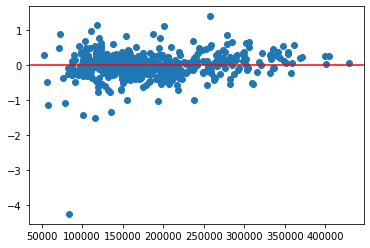

In [34]:
plt.scatter(pred2_reversed, residuals)
plt.axhline(0, color='r');

In [35]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, pred2_reversed))

25016.838795719483

In [2237]:
X2 = sm.add_constant(X2_train)
y = y_train_pt
model = sm.OLS(y, X2).fit()

In [2238]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     643.8
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:46:40   Log-Likelihood:                -694.97
No. Observations:                1538   AIC:                             1420.
Df Residuals:                    1523   BIC:                             1500.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.547e-15      0.010  -1.59e-13      1.000      -0.019       0.019
x1             0.3138      0.017     18.207      0.000       0.280       0.348
x2             0.2852      0.022     12.937      0.000       0.242       0.328
x3             0.0924      0.014      6.637      0.000       0.065       0.120
x4             0.0966      0.016      6.179      0.000       0.066       0.127
x5             0.0421      0.017      2.521      0.012       0.009       0.075
x6            -0.1110      0.018     -6.105      0.000      -0.147      -0.075
x7            -0.1137      0.015     -7.544      0.000      -0.143      -0.084
x8            -0.0293      0.014     -2.054      0.040      -0.057      -0.001
x9            -0.0310      0.018     -1.763      0.078      -0.065       0.003
x10            0.0926      0.012      7.956      0.000       0.070       0.115
x11            0.0779      0.012      6.587      0.000       0.055       0.101
x12            0.1170      0.012      9.447      0.000       0.093       0.141
x13           -0.0599      0.010     -6.058      0.000      -0.079      -0.041
x14           -0.0323      0.011     -3.048      0.002      -0.053      -0.012
==============================================================================
Omnibus:                      886.202   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20045.276
Skew:                          -2.231   Prob(JB):                         0.00
Kurtosis:                      20.114   Cond. No.                         6.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3 - Age and Quality

In [36]:
# Define X & y variables
X_list_3 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Age At Sale', 
            'Years Since Remod/Add', 'Full Bath', 'HasFireplace', 
            'BsmtFin Type 1_GLQ','IsNotNormalCondition1', 'Overall Cond', 
            'Mo Sold', 'Sale Type_CWD', 'Sale Type_Con', 
            'Sale Type_ConLD', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 
            'Sale Type_WD ']
X3 = df_cl[X_list_3]
y = df_cl["SalePrice"]

In [37]:
# Create train test split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = .25, random_state=42)

### Run PowerTransformer on X data

In [38]:
pt = PowerTransformer()
pt.fit(X3_train)
X3_train = pt.transform(X3_train)
X3_test = pt.transform(X3_test)

### Run PowerTransformer on Y data

In [39]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

### Instantiate models

In [40]:
# Instantiate model
lm3 = LinearRegression()

### Cross Validation

In [41]:
# Run cross validation
cross_val_score(lm3, X3_train, y_train_pt, cv=5).mean()

0.8554545199115102

### Model Fit & Evaluation

In [42]:
# Fit model
lm3.fit(X3_train, y_train_pt);

In [43]:
# Score training data
lm3.score(X3_train, y_train_pt)

0.8647290493667551

In [44]:
# Score test data
lm3.score(X3_test, y_test_pt)

0.869334617101587

### Check residuals

In [46]:
preds3 = lm3.predict(X3_test)

In [47]:
preds3.mean()

0.024389422310303523

In [48]:
pred3_reversed = pt_y.inverse_transform(preds3.reshape(-1,1))

In [49]:
pred3_reversed.mean()

180103.84473565005

In [50]:
residuals3 = y_test_pt - preds3

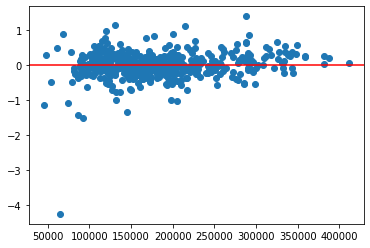

In [51]:
plt.scatter(pred3_reversed, residuals)
plt.axhline(0, color='r');

In [52]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, pred3_reversed))

25741.613236918118

In [2254]:
X3 = sm.add_constant(X3_train)
y = y_train_pt
model = sm.OLS(y, X3).fit()

In [2255]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     484.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:47:15   Log-Likelihood:                -643.96
No. Observations:                1538   AIC:                             1330.
Df Residuals:                    1517   BIC:                             1442.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.547e-15      0.009  -1.64e-13      1.000      -0.019       0.019
x1             0.2344      0.017     13.792      0.000       0.201       0.268
x2             0.3139      0.016     19.986      0.000       0.283       0.345
x3             0.1171      0.013      8.813      0.000       0.091       0.143
x4             0.0966      0.015      6.350      0.000       0.067       0.126
x5             0.1107      0.015      7.153      0.000       0.080       0.141
x6            -0.2429      0.021    -11.776      0.000      -0.283      -0.202
x7            -0.0236      0.016     -1.449      0.148      -0.056       0.008
x8            -0.0326      0.014     -2.359      0.018      -0.060      -0.005
x9             0.0869      0.011      7.680      0.000       0.065       0.109
x10            0.0740      0.012      6.416      0.000       0.051       0.097
x11           -0.0362      0.010     -3.743      0.000      -0.055      -0.017
x12            0.1697      0.012     14.530      0.000       0.147       0.193
x13            0.0127      0.010      1.333      0.183      -0.006       0.031
x14            0.0150      0.010      1.485      0.138      -0.005       0.035
x15            0.0205      0.010      2.124      0.034       0.002       0.039
x16            0.0273      0.010      2.602      0.009       0.007       0.048
x17            0.0191      0.010      1.979      0.048       0.000       0.038
x18            0.0469      0.017      2.680      0.007       0.013       0.081
x19            0.0354      0.010      3.637      0.000       0.016       0.054
x20            0.0638      0.017      3.733      0.000       0.030       0.097
==============================================================================
Omnibus:                      887.420   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26202.106
Skew:                          -2.145   Prob(JB):                         0.00
Kurtosis:                      22.760   Cond. No.                         6.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4 - Top variables plus Exterior variables

In [53]:
# Define X & y variables
X_list_4 = [ 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Age At Sale', 
            'Years Since Remod/Add', 'Full Bath', 'HasFireplace', 
            'BsmtFin Type 1_GLQ','IsHipRoof', 'Exterior 1st_BrkFace', 'Exterior 1st_CemntBd', 
            'Exterior 1st_HdBoard', 
            'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_VinylSd', 
            'Exterior 1st_Wd Sdng', 'Exterior 1st_WdShing', 'DiffExt2', 
            'Mas Vnr Type_BrkFace', 'Mas Vnr Type_Stone', 'Mas Vnr Type_None', 'Exter Qual_Fa', 
            'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Cond_Fa', 'Exter Cond_Gd', 'Exter Cond_Po', 
            'Exter Cond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab']
X4 = df_cl[X_list_4]
y = df_cl["SalePrice"]

In [54]:
# Create train test split
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size = .25, random_state=42)

### Run PowerTransformer on X data

In [55]:
pt = PowerTransformer()
pt.fit(X4_train)
X4_train = pt.transform(X4_train)
X4_test = pt.transform(X4_test)

### Run PowerTransformer on Y data

In [56]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

### Instantiate models

In [57]:
# Instantiate model
lm4 = LinearRegression()

### Cross Validation

In [58]:
# Run cross validation
cross_val_score(lm4, X4_train, y_train_pt, cv=5).mean()

0.8482098723419771

### Model Fit & Evaluation

In [59]:
# Fit model
lm4.fit(X4_train, y_train_pt);

In [60]:
# Score training data
lm4.score(X4_train, y_train_pt)

0.8645439506828172

In [61]:
# Score test data
lm4.score(X4_test, y_test_pt)

0.8560846086738768

### Check residuals

In [62]:
preds4 = lm4.predict(X4_test)

In [63]:
preds4.mean()

0.035387500686831434

In [64]:
pred4_reversed = pt_y.inverse_transform(preds4.reshape(-1,1))

In [65]:
pred4_reversed.mean()

181068.3883209662

In [66]:
residuals = y_test_pt - preds4

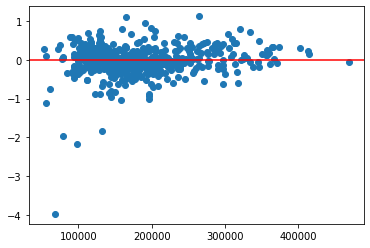

In [67]:
plt.scatter(pred4_reversed, residuals)
plt.axhline(0, color='r');

In [68]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, pred4_reversed))

25930.29544772229

In [2272]:
X = sm.add_constant(X4_train)
y = y_train_pt
model = sm.OLS(y, X).fit()

In [2273]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     290.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:47:58   Log-Likelihood:                -645.01
No. Observations:                1538   AIC:                             1358.
Df Residuals:                    1504   BIC:                             1540.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.987e-15      0.009  -3.15e-13      1.000      -0.019       0.019
x1             0.2497      0.018     13.803      0.000       0.214       0.285
x2             0.2981      0.016     18.518      0.000       0.267       0.330
x3             0.1161      0.014      8.536      0.000       0.089       0.143
x4             0.0524      0.018      2.871      0.004       0.017       0.088
x5             0.0993      0.017      5.679      0.000       0.065       0.134
x6            -0.0604      0.025     -2.432      0.015      -0.109      -0.012
x7            -0.1120      0.016     -6.860      0.000      -0.144      -0.080
x8            -0.0294      0.014     -2.068      0.039      -0.057      -0.002
x9             0.0890      0.012      7.740      0.000       0.066       0.112
x10            0.0770      0.012      6.633      0.000       0.054       0.100
x11            0.0299      0.011      2.800      0.005       0.009       0.051
x12            0.0831      0.013      6.508      0.000       0.058       0.108
x13            0.0473      0.016      2.950      0.003       0.016       0.079
x14            0.1198      0.022      5.455      0.000       0.077       0.163
x15            0.1112      0.022      5.093      0.000       0.068       0.154
x16            0.0781      0.018      4.392      0.000       0.043       0.113
x17            0.1448      0.029      4.912      0.000       0.087       0.203
x18            0.0915      0.020      4.475      0.000       0.051       0.132
x19            0.0358      0.013      2.808      0.005       0.011       0.061
x20            0.0227      0.013      1.722      0.085      -0.003       0.049
x21            0.1291      0.053      2.424      0.015       0.025       0.234
x22            0.0701      0.032      2.190      0.029       0.007       0.133
x23            0.1333      0.056      2.380      0.017       0.023       0.243
x24           -0.0746      0.014     -5.412      0.000      -0.102      -0.048
x25           -0.1085      0.029     -3.789      0.000      -0.165      -0.052
x26           -0.1418      0.035     -4.076      0.000      -0.210      -0.074
x27           -0.0838      0.028     -2.979      0.003      -0.139      -0.029
x28           -0.0662      0.052     -1.262      0.207      -0.169       0.037
x29           -0.0791      0.012     -6.774      0.000      -0.102      -0.056
x30           -0.1025      0.058     -1.772      0.077      -0.216       0.011
x31            0.0754      0.019      3.966      0.000       0.038       0.113
x32            0.0780      0.023      3.347      0.001       0.032       0.124
x33           -0.0158      0.013     -1.257      0.209      -0.040       0.009
==============================================================================
Omnibus:                      599.384   Durbin-Watson:                   1.896
Pr

### Model 5 - Top Variables plus Misc Additional Features

In [69]:
# Define X & y variables
X_list_5 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 
            'Age At Sale', 'Years Since Remod/Add', 'TotRms AbvGrd', 
            'HasFireplace', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Bsmt Qual_FairPoor',  
            'BsmtFin Type 1_Unf', 'BsmtFin SF 1', 
            'Heating QC_Fa', 'Heating QC_Gd',  
            'Heating QC_TA', 'Central Air', 'NotStdElectrical', 'HasExGdFireplace', 
            'Garage Type_Attchd', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 
            'IsNotPavedDrive', 'Wood Deck SF', 'Open Porch SF', 
            '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
X5 = df_cl[X_list_5]
y = df_cl["SalePrice"]

In [70]:
# Create train test split
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size = .25, random_state=42)

### Run PowerTransformer on X data

In [71]:
pt = PowerTransformer()
pt.fit(X5_train)
X5_train = pt.transform(X5_train)
X5_test = pt.transform(X5_test)

### Run PowerTransformer on Y data

In [72]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

### Instantiate models

In [73]:
# Instantiate model
lm5 = LinearRegression()

### Cross Validation

In [74]:
# Run cross validation
cross_val_score(lm5, X5_train, y_train_pt, cv=5).mean()

0.8619765606642827

### Model Fit & Evaluation

In [75]:
# Fit model
lm5.fit(X5_train, y_train_pt);

In [76]:
# Score training data
lm5.score(X5_train, y_train_pt)

0.8743380149216706

In [77]:
# Score test data
lm5.score(X5_test, y_test_pt)

0.86710013667019

### Check residuals

In [78]:
preds5 = lm5.predict(X5_test)

In [79]:
preds5.mean()

0.032050668584741905

In [80]:
pred5_reversed = pt_y.inverse_transform(preds5.reshape(-1,1))

In [81]:
pred5_reversed.mean()

181143.52570090396

In [82]:
residuals5 = y_test_pt - preds5

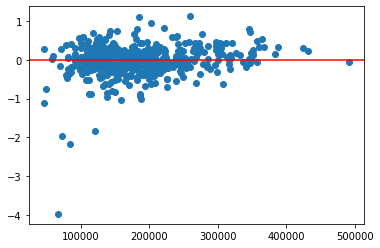

In [83]:
plt.scatter(pred5_reversed, residuals)
plt.axhline(0, color='r');

In [84]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, pred5_reversed))

25441.89414579718

In [85]:
X5 = sm.add_constant(X5_train)
y = y_train_pt
model = sm.OLS(y, X5).fit()

In [2290]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     349.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:48:37   Log-Likelihood:                -587.30
No. Observations:                1538   AIC:                             1237.
Df Residuals:                    1507   BIC:                             1402.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.152e-15      0.009  -2.36e-13      1.000      -0.018       0.018
x1             0.2795      0.016     17.197      0.000       0.248       0.311
x2             0.2527      0.021     12.153      0.000       0.212       0.293
x3             0.0918      0.013      7.036      0.000       0.066       0.117
x4             0.0364      0.019      1.946      0.052      -0.000       0.073
x5             0.0982      0.017      5.731      0.000       0.065       0.132
x6            -0.0300      0.021     -1.401      0.161      -0.072       0.012
x7            -0.1182      0.015     -7.668      0.000      -0.148      -0.088
x8             0.0209      0.017      1.241      0.215      -0.012       0.054
x9             0.0507      0.013      3.805      0.000       0.025       0.077
x10           -0.0631      0.017     -3.615      0.000      -0.097      -0.029
x11           -0.0721      0.022     -3.256      0.001      -0.116      -0.029
x12           -0.0445      0.012     -3.664      0.000      -0.068      -0.021
x13            0.0463      0.023      2.059      0.040       0.002       0.090
x14            0.1783      0.024      7.534      0.000       0.132       0.225
x15           -0.0366      0.010     -3.523      0.000      -0.057      -0.016
x16           -0.0180      0.010     -1.715      0.087      -0.038       0.003
x17           -0.0479      0.012     -3.950      0.000      -0.072      -0.024
x18            0.0526      0.011      4.789      0.000       0.031       0.074
x19           -0.0200      0.010     -1.944      0.052      -0.040       0.000
x20            0.0183      0.013      1.457      0.145      -0.006       0.043
x21            0.0275      0.013      2.170      0.030       0.003       0.052
x22            0.0304      0.011      2.669      0.008       0.008       0.053
x23           -0.0287      0.009     -3.085      0.002      -0.047      -0.010
x24           -0.0473      0.011     -4.288      0.000      -0.069      -0.026
x25            0.0261      0.010      2.561      0.011       0.006       0.046
x26            0.0162      0.011      1.442      0.149      -0.006       0.038
x27            0.0126      0.009      1.365      0.173      -0.006       0.031
x28            0.0519      0.009      5.472      0.000       0.033       0.070
x29           -0.0337      0.009     -3.627      0.000      -0.052      -0.015
x30           -0.0150      0.009     -1.610      0.108      -0.033       0.003
==============================================================================
Omnibus:                      802.163   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17366.824
Skew:                          -1.949   Prob(JB):                         0.00
Kurtosis:                      18.994   Cond. No.                         9.81
==

### Model 6 - Top Variables plus Size & Key Features

In [86]:
# Define X & y variables
X_list_6 = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 
            'Age At Sale', 'Years Since Remod/Add',  
            'HasFireplace', '2nd Flr SF', 'Low Qual Fin SF', 
            'HasBsmtFullBath', 'HasBsmtHalfBath', 'Half Bath', 'Kitchen AbvGr', 
            'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Kitchen Qual_Fa', 'IsNotTypFunctional']

X6 = df_cl[X_list_6]
y = df_cl["SalePrice"]

In [87]:
# Create train test split
X6_train, X6_test, y_train, y_test = train_test_split(X6, y, test_size = .25, random_state=42)

### Run PowerTransformer on X data

In [88]:
pt = PowerTransformer()
pt.fit(X6_train)
X6_train = pt.transform(X6_train)
X6_test = pt.transform(X6_test)

### Run PowerTransformer on Y data

In [89]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

### Instantiate models

In [90]:
# Instantiate model
lm6 = LinearRegression()

### Cross Validation

In [91]:
# Run cross validation
cross_val_score(lm6, X6_train, y_train_pt, cv=5).mean()

0.8539335069577174

### Model Fit & Evaluation

In [92]:
# Fit model
lm6.fit(X6_train, y_train_pt);

In [93]:
# Score training data
lm6.score(X6_train, y_train_pt)

0.862112655572718

In [94]:
# Score test data
lm6.score(X6_test, y_test_pt)

0.8611057285618093

### Check residuals

In [95]:
preds6 = lm6.predict(X6_test)

In [96]:
preds6.mean()

0.02719218179230507

In [97]:
pred6_reversed = pt_y.inverse_transform(preds6.reshape(-1,1))

In [98]:
pred6_reversed.mean()

180491.0326103278

In [99]:
residuals6 = y_test_pt - preds6

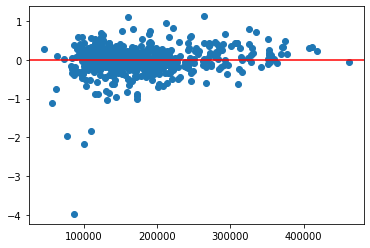

In [100]:
plt.scatter(pred6_reversed, residuals)
plt.axhline(0, color='r');

In [102]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, pred6_reversed))

24516.922777779513

In [2306]:
X6 = sm.add_constant(X6_train)
y = y_train_pt
model = sm.OLS(y, X6).fit()

In [1554]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     533.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:22:41   Log-Likelihood:                -651.61
No. Observations:                1538   AIC:                             1341.
Df Residuals:                    1519   BIC:                             1443.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.547e-15      0.009  -1.63e-13      1.000      -0.019       0.019
x1             0.2444      0.018     13.850      0.000       0.210       0.279
x2             0.3532      0.042      8.445      0.000       0.271       0.435
x3             0.1047      0.013      7.784      0.000       0.078       0.131
x4             0.0457      0.016      2.930      0.003       0.015       0.076
x5             0.0667      0.039      1.725      0.085      -0.009       0.142
x6             0.0856      0.016      5.231      0.000       0.054       0.118
x7             0.1093      0.015      7.491      0.000       0.081       0.138
x8             0.0766      0.012      6.643      0.000       0.054       0.099
x9            -0.0663      0.036     -1.830      0.067      -0.137       0.005
x10           -0.0307      0.010     -2.927      0.003      -0.051      -0.010
x11            0.1045      0.010     10.138      0.000       0.084       0.125
x12            0.0270      0.010      2.755      0.006       0.008       0.046
x13            0.0308      0.013      2.406      0.016       0.006       0.056
x14           -0.0533      0.010     -5.175      0.000      -0.073      -0.033
x15           -0.1235      0.020     -6.052      0.000      -0.164      -0.083
x16           -0.1543      0.025     -6.234      0.000      -0.203      -0.106
x17           -0.0913      0.013     -7.063      0.000      -0.117      -0.066
x18           -0.0681      0.010     -6.625      0.000      -0.088      -0.048
==============================================================================
Omnibus:                      828.872   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18595.427
Skew:                          -2.030   Prob(JB):                         0.00
Kurtosis:                      19.544   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ensemble Predictions

In [103]:
#Get cleaned test data file
df_test = pd.read_csv("../datasets/test_cleaned.csv")

In [2307]:
#Model 1 
X_1 = df_test[X_list_1]

In [2308]:
pt.fit(X_1)
X_1_pt = pt.transform(X_1)
preds1 = lm1.predict(X_1_pt)

In [2309]:
pred1_reversed = pt_y.inverse_transform(preds1.reshape(-1,1))

In [2310]:
pred1_reversed.mean()

179058.99234397968

In [2311]:
df_test["pred1"] = pred1_reversed

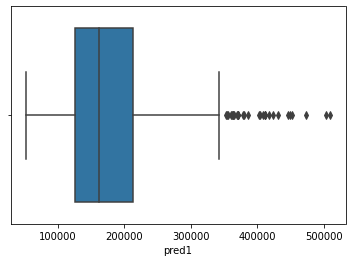

In [2312]:
sns.boxplot(df_test["pred1"])

In [2313]:
#Model 2 
X_2 = df_test[X_list_2]

In [2314]:
pt.fit(X_2)
X_2_pt = pt.transform(X_2)
preds2 = lm2.predict(X_2_pt)

In [2315]:
pred2_reversed = pt_y.inverse_transform(preds2.reshape(-1,1))

In [2316]:
pred2_reversed.mean()

178800.54885889328

In [2317]:
pred2_reversed.shape

(878, 1)

In [2318]:
df_test["pred2"] = pred2_reversed

In [2319]:
#Model 3 
X_3 = df_test[X_list_3]

In [2320]:
pt.fit(X_3)
X_3_pt = pt.transform(X_3)
preds3 = lm3.predict(X_3_pt)

In [2321]:
pred3_reversed = pt_y.inverse_transform(preds3.reshape(-1,1))

In [2322]:
pred3_reversed.mean()

178481.23980072778

In [2323]:
pred3_reversed.shape

(878, 1)

In [2324]:
df_test["pred3"] = pred3_reversed

In [2325]:
#Model 4 
X_4 = df_test[X_list_4]

In [2326]:
pt.fit(X_4)
X_4_pt = pt.transform(X_4)
preds4 = lm4.predict(X_4_pt)

In [2327]:
pred4_reversed = pt_y.inverse_transform(preds4.reshape(-1,1))

In [2328]:
pred4_reversed.mean()

178639.1414509078

In [2329]:
pred4_reversed.shape

(878, 1)

In [2330]:
df_test["pred4"] = pred4_reversed

In [2331]:
#Model 5 
X_5 = df_test[X_list_5]

In [2332]:
pt.fit(X_5)
X_5_pt = pt.transform(X_5)
preds5 = lm5.predict(X_5_pt)

In [2333]:
pred5_reversed = pt_y.inverse_transform(preds5.reshape(-1,1))

In [2334]:
pred5_reversed.mean()

178612.7235599056

In [2335]:
pred5_reversed.shape

(878, 1)

In [2336]:
df_test["pred5"] = pred5_reversed

In [2337]:
#Model 6
X_6 = df_test[X_list_6]

In [2338]:
pt.fit(X_6)
X_6_pt = pt.transform(X_6)
preds6 = lm6.predict(X_6_pt)

In [2339]:
pred6_reversed = pt_y.inverse_transform(preds6.reshape(-1,1))

In [2340]:
pred6_reversed.mean()

178650.77109674105

In [2341]:
pred6_reversed.shape

(878, 1)

In [2342]:
df_test["pred6"] = pred6_reversed

In [2343]:
df_test[["pred1", "pred2", "pred3", "pred4", "pred5", "pred6"]]

,pred1,pred2,pred3,pred4,pred5,pred6
0,132984.715427,142199.270092,161339.479222,108861.833749,122504.300129,118385.884923
1,161843.122158,175734.557185,179755.437664,179526.612021,170702.399518,166673.439494
2,206817.389913,240917.970112,210171.087923,212180.275740,214427.088004,218354.402251
3,114824.092942,127058.703919,117961.330828,131570.076184,113850.303896,125283.321770
4,173131.289944,173403.090021,170713.559788,170144.591476,193945.960401,185607.639589
...,...,...,...,...,...,...
873,186232.782053,176462.295981,187394.013168,183572.731982,190618.497496,198332.489076
874,200139.428059,197427.775835,208740.548063,208398.184754,213751.715737,198409.986458
875,137921.647722,133604.935523,129820.361156,142313.047983,139982.098504,132434.105810
876,111546.646014,103033.566317,110085.226150,106545.149367,106663.050309,101811.725086


In [2344]:
#Average predictions across the six sub-models
df_test["Ens_6_Pred_Price"] = (df_test["pred1"] + 
                               df_test["pred2"] + 
                               df_test["pred3"] + 
                               df_test["pred4"] + 
                               df_test["pred5"] + 
                               df_test["pred6"])/6

In [2345]:
#Another version, just averaging the results from the two models with the lowest RMSE
df_test["Ens_2_Pred_Price"] = (df_test["pred1"] + df_test["pred5"]) / 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3576dad0>,
      dtype=object)

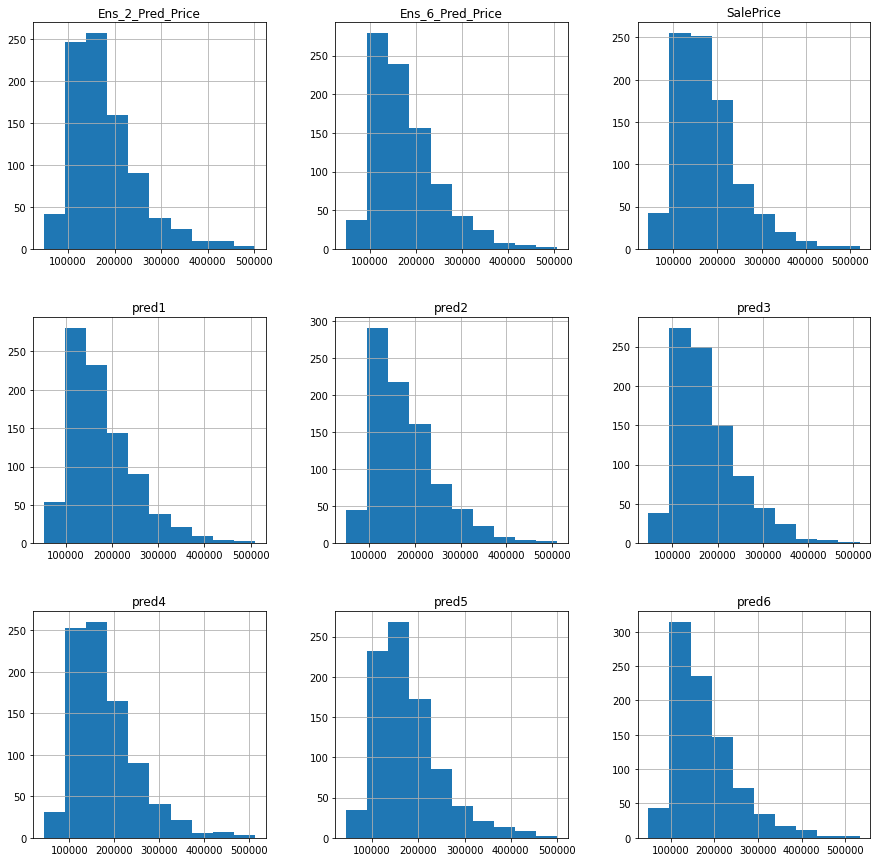

In [2346]:
#Look at similarity of distributions of predictions
df_test[["pred1", "pred2", "pred3", "pred4", "pred5", "pred6",
         "Ens_6_Pred_Price", "Ens_2_Pred_Price", "SalePrice"]].hist(figsize=(15,15))

In [2347]:
#Create SalePrice variable for test data file for kaggle submission
#Substitute "Ens_6_Pred_Price" if you want to use the 6-sub-model version instead
df_test["SalePrice"] = df_test["Ens_2_Pred_Price"]
df_test["SalePrice"].mean()

178835.8579519426

In [2348]:
# Save file to csv for submission to kaggle
df_test[["Id", "SalePrice"]].to_csv("../datasets/submission.csv", index=False)